# Observations and Insights

1) Capomulin and Ramicane appeared to be the most successful at reducing the Tumor Volume in the studied mice. They each had the lowest mean by far (only two under 41 mm3 while next closest was over 52 mm3) and had the lowest standard deviations as well.

2) Based on the correlation coefficient and the regression model, we can argue that the weight of the mouse has a significant predictive value on how large their tumor would be. The correlation coefficient is .53

3) Mice treated with Capomulin were very likely to have a reduction in Tumor size. Via the lineplot, we can see that nearly all mice that were treated with Capomulin had a smaller tumor volume at the end of treatment vs. the beginning.

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import pearsonr
import numpy as np

# Study data files
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse_ID", how="outer")

combined_data

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Summary Statistics

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

combined_data.describe()

# groupby Drug Regimen

dr_group = combined_data.groupby("Drug Regimen")

# create variables to store formulas for calculation

dr_mean = dr_group["Tumor Volume (mm3)"].mean()
dr_median = dr_group["Tumor Volume (mm3)"].median()
dr_var = dr_group["Tumor Volume (mm3)"].var()
dr_std = dr_group["Tumor Volume (mm3)"].std()
dr_sem = dr_group["Tumor Volume (mm3)"].sem()

# create summary dataframe

dr_summary = pd.DataFrame({"Mean": dr_mean,
                          "Median": dr_median,
                          "Variance": dr_var,
                          "Standard Deviation": dr_std,
                          "Standard Error": dr_sem})

# print summary

dr_summary


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


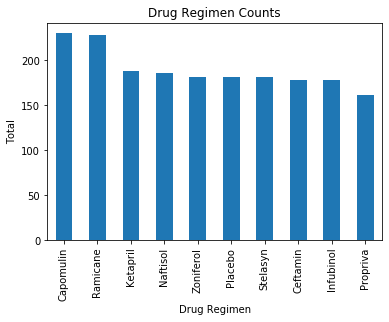

In [86]:
# Bar Plots pt. 1

# Generate a bar plot showing number of data points for each treatment regimen using pandas

# count total data points for each drug regimen

drug_regimen_count = combined_data["Drug Regimen"].value_counts()

drug_regimen_count

# plot bar graph of values

drug_regimen_count.plot(kind="bar")

# add labels to graph

plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Total")
plt.show()



<BarContainer object of 10 artists>

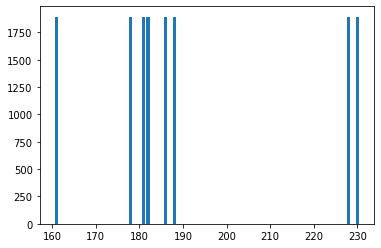

In [87]:
# Bar Plots pt. 2
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = combined_data["Drug Regimen"].value_counts()
y_axis = len(combined_data["Tumor Volume (mm3)"])

plt.bar(x_axis, y_axis )



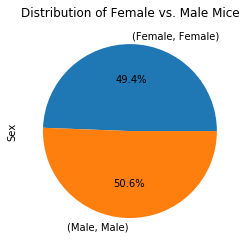

In [88]:
# Pie Plots pt. 1

# Generate a pie plot showing the distribution of female versus male mice using pandas

# groupby Sex

gender_pie = combined_data.groupby("Sex")

# determine the number of mice of each sex

gender_pie = gender_pie["Sex"].value_counts()

gender_pie

# plot the pie chart and add a title

gender_pie.plot(kind="pie", autopct="%1.1f%%")

plt.title("Distribution of Female vs. Male Mice")


plt.show()



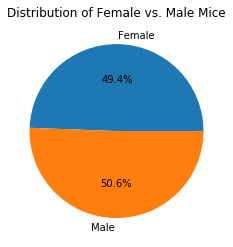

In [89]:
# Pie Plots pt. 2

# Generate a pie plot showing the distribution of female versus male mice using pyplot

# create labels for chart

labels = ["Female", "Male"]

# using same DF, create pie chart using .plt

plt.pie(gender_pie, labels=labels, autopct="%1.1f%%")

# add a title

plt.title("Distribution of Female vs. Male Mice")

plt.show()

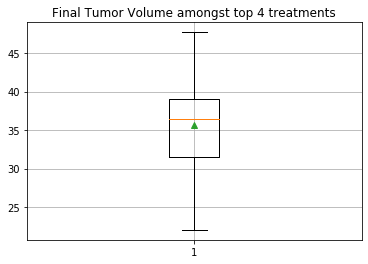

7.422408189999999


In [90]:
# Quartiles, Outliers, and Boxplots

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# determine final tumor volume of each mouse 

most_promising = combined_data.nsmallest(4, "Tumor Volume (mm3)")
dfToList = most_promising["Drug Regimen"].tolist()


final_tv = combined_data[(combined_data["Timepoint"] == 45) & (combined_data["Drug Regimen"].isin(dfToList))] 

# calculate IQR and outliers

q1 = np.percentile( final_tv["Tumor Volume (mm3)"], 25)
q3 = np.percentile( final_tv["Tumor Volume (mm3)"], 75)

iqr=q3-q1

lbr = q1 - 1.5 * iqr
ubr = q3 + 1.5 * iqr

final_tv["Tumor Volume (mm3)"][final_tv["Tumor Volume (mm3)"]<=lbr]
final_tv["Tumor Volume (mm3)"][final_tv["Tumor Volume (mm3)"]>=ubr]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(final_tv["Tumor Volume (mm3)"], showmeans=True)
plt.grid()
plt.title("Final Tumor Volume amongst top 4 treatments")

plt.show()

print(iqr)



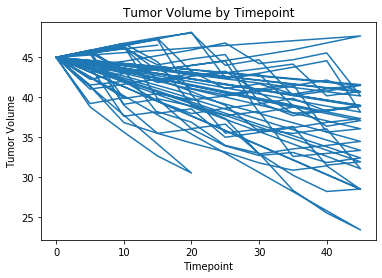

In [91]:
# Line and Scatter Plots

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# isolate Capomulin treated mice

capo_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

capo_data

# define axes

x_axis = capo_data["Timepoint"]
y_axis = capo_data["Tumor Volume (mm3)"]

# plot line chart

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume by Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()



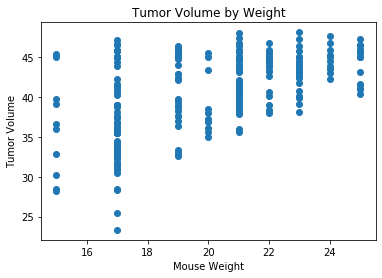

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

y_axis = capo_data["Tumor Volume (mm3)"]

x_axis = capo_data["Weight (g)"]

plt.scatter(x_axis, y_axis)
plt.title("Tumor Volume by Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

plt.show()


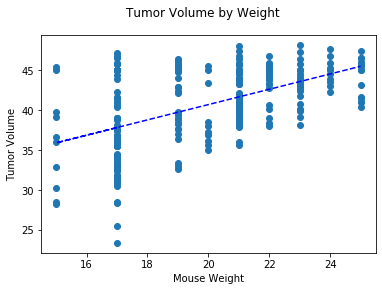

In [93]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regime

# create regression line

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# plot data on chart

fig, ax = plt.subplots()

fig.suptitle("Tumor Volume by Weight", fontsize=12)


ax.set_xlabel("Mouse Weight")
ax.set_ylabel("Tumor Volume")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [94]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regime

# set x & y axis

x_axis = capo_data["Weight (g)"]
y_axis = capo_data["Tumor Volume (mm3)"]

# calc correlation coefficient from pearsonr (from scipy)

cor_coe = pearsonr(x_axis, y_axis)

cor_coe


(0.525699555207717, 9.605446629502006e-18)